# Modelo de Arvores de Decisões - CAPES

## Importing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns

pd.set_option('display.max_columns', None)

import warnings

warnings.filterwarnings('ignore') #ou warnings.filterwarnings(action='once')

## Extrating

In [2]:
uri = 'https://raw.githubusercontent.com/ieee-uerj/capes-data-analysis/main/data/Grande%20Base.csv'
df_inicial = pd.read_csv(uri, encoding='latin-1')

## Tranforming

In [3]:
df = df_inicial.select_dtypes(exclude = 'object').drop(columns = ["NR_PAGINAS", "GUS_pag_por_aluno"])
df = df.dropna()

In [4]:
df.head()

,AN_BASE,CD_AREA_AVALIACAO,CONCEITO_PROGRAMA,IB_Total_docentes,IB_Mulheres,IB_Homens,IB_Brasileiros,IB_Estrangeiros,IB_QTDE_Regime_Parcial,IB_QTDE_Regime_Integral,IB_QTDE_Regime_Exclusivo,IB_QTDE_Prof_Doutor,IB_QTDE_Prof_NaoDoutor,IB_QTDE_titulados_Brasil,IB_QTDE_titulados_Exterior,IB_Profs_Colaboradores,IB_Profs_ServidoresPublicos,IB_Profs_VinculoCLT,IB_Profs_Aposentados,IB_Profs_BolsaDeFixacao,IB_Total_cursos,MEDIA_CONCEITO_CURSO,ID_SUBTIPO_PRODUCAO,IN_TRABALHO_MESMA_AREA,GUS_Lingua_estrangeira,GUS_Quantidade_Trabalhos,GUS_Do_Homens,GUS_Do_Mulheres,GUS_Do_Brasileiros,GUS_Do_Estrangeiros,GUS_Quantidade_Docentes,AN_NASCIMENTO_DOCENTE,GUS_Dis_Homens,GUS_Dis_Mulheres,GUS_Dis_Brasileiros,GUS_Dis_Estrangeiros,GUS_diferenca_idade,GUS_razao_aluno_prof,GUS_Quantidade_Discentes,GUS_Dis_Prop_Homens,GUS_Dis_Aluno_Tempo,QT_MES_TITULACAO,AN_NASCIMENTO_DISCENTE,CD_CONCEITO_PROGRAMA,Unnamed: 0,NM_MODALIDADE_PROGRAMA,Qtd_Proj,N_PESQUISA,Outros projetos,Qtd_Financiadores,BOLSA,OUTRO AUXÃÂLIO FINANCEIRO,SEM AUXÃÂLIO,PÃÂBLICA_OU_PRIVADA,QTD_FINANCIADORES
0,2013,9,3,25,10,15,25,0,16,9,0,25,0,23,2,12,8,2,3,0,2,3.0,2.0,0.0,0,21,15,10,25,0,25,1967.560000,29,48,77,0,13.440000,3.080000,77,0.376623,1.889019,40.761905,1981.000000,3,0,1,19,17.0,2.0,16,1.0,15.0,0.0,1,3
1,2014,9,3,22,8,14,22,0,16,6,0,22,0,20,2,12,7,0,3,0,2,3.0,2.0,1.0,0,13,14,8,22,0,22,1966.954545,26,43,68,1,16.320817,3.136364,69,0.376812,2.193154,31.461538,1983.275362,3,3255,1,26,23.0,3.0,20,1.0,19.0,0.0,1,3
2,2015,9,3,22,8,14,22,0,15,5,2,22,0,20,2,12,9,0,1,0,2,3.0,2.0,0.0,0,20,14,8,22,0,22,1971.136364,33,57,88,2,13.174747,4.090909,90,0.366667,3.082192,29.200000,1984.311111,3,6689,1,26,23.0,3.0,19,1.0,18.0,0.0,1,3
3,2016,9,3,20,7,13,20,0,14,4,2,20,0,18,2,11,8,0,1,0,2,3.0,2.0,0.0,0,18,13,7,20,0,20,1972.200000,28,53,80,1,14.293827,4.050000,81,0.345679,2.685083,30.166667,1986.493827,3,10272,1,40,35.0,5.0,32,2.0,30.0,0.0,1,4
4,2017,9,4,22,8,14,22,0,16,4,2,22,0,20,2,12,9,0,1,0,2,4.0,2.0,1.0,0,21,14,8,22,0,22,1973.727273,43,64,106,1,13.852167,4.863636,107,0.401869,3.763819,28.428571,1987.579439,4,14025,1,68,61.0,7.0,58,6.0,52.0,0.0,1,4


In [9]:
def cria_coluna_alvo(row):
    
    conceito = row['CONCEITO_PROGRAMA']
    
    if conceito >= 5:
        return 1
    else:
        return 0

In [10]:
df['BOM_CONCEITO'] = df.apply(cria_coluna_alvo, axis = 1)

In [11]:
df['BOM_CONCEITO'].value_counts()

0    13896
1     6353
Name: BOM_CONCEITO, dtype: int64

In [13]:
df.head()

,AN_BASE,CD_AREA_AVALIACAO,CONCEITO_PROGRAMA,IB_Total_docentes,IB_Mulheres,IB_Homens,IB_Brasileiros,IB_Estrangeiros,IB_QTDE_Regime_Parcial,IB_QTDE_Regime_Integral,IB_QTDE_Regime_Exclusivo,IB_QTDE_Prof_Doutor,IB_QTDE_Prof_NaoDoutor,IB_QTDE_titulados_Brasil,IB_QTDE_titulados_Exterior,IB_Profs_Colaboradores,IB_Profs_ServidoresPublicos,IB_Profs_VinculoCLT,IB_Profs_Aposentados,IB_Profs_BolsaDeFixacao,IB_Total_cursos,MEDIA_CONCEITO_CURSO,ID_SUBTIPO_PRODUCAO,IN_TRABALHO_MESMA_AREA,GUS_Lingua_estrangeira,GUS_Quantidade_Trabalhos,GUS_Do_Homens,GUS_Do_Mulheres,GUS_Do_Brasileiros,GUS_Do_Estrangeiros,GUS_Quantidade_Docentes,AN_NASCIMENTO_DOCENTE,GUS_Dis_Homens,GUS_Dis_Mulheres,GUS_Dis_Brasileiros,GUS_Dis_Estrangeiros,GUS_diferenca_idade,GUS_razao_aluno_prof,GUS_Quantidade_Discentes,GUS_Dis_Prop_Homens,GUS_Dis_Aluno_Tempo,QT_MES_TITULACAO,AN_NASCIMENTO_DISCENTE,CD_CONCEITO_PROGRAMA,Unnamed: 0,NM_MODALIDADE_PROGRAMA,Qtd_Proj,N_PESQUISA,Outros projetos,Qtd_Financiadores,BOLSA,OUTRO AUXÃÂLIO FINANCEIRO,SEM AUXÃÂLIO,PÃÂBLICA_OU_PRIVADA,QTD_FINANCIADORES,BOM_CONCEITO
0,2013,9,3,25,10,15,25,0,16,9,0,25,0,23,2,12,8,2,3,0,2,3.0,2.0,0.0,0,21,15,10,25,0,25,1967.560000,29,48,77,0,13.440000,3.080000,77,0.376623,1.889019,40.761905,1981.000000,3,0,1,19,17.0,2.0,16,1.0,15.0,0.0,1,3,0
1,2014,9,3,22,8,14,22,0,16,6,0,22,0,20,2,12,7,0,3,0,2,3.0,2.0,1.0,0,13,14,8,22,0,22,1966.954545,26,43,68,1,16.320817,3.136364,69,0.376812,2.193154,31.461538,1983.275362,3,3255,1,26,23.0,3.0,20,1.0,19.0,0.0,1,3,0
2,2015,9,3,22,8,14,22,0,15,5,2,22,0,20,2,12,9,0,1,0,2,3.0,2.0,0.0,0,20,14,8,22,0,22,1971.136364,33,57,88,2,13.174747,4.090909,90,0.366667,3.082192,29.200000,1984.311111,3,6689,1,26,23.0,3.0,19,1.0,18.0,0.0,1,3,0
3,2016,9,3,20,7,13,20,0,14,4,2,20,0,18,2,11,8,0,1,0,2,3.0,2.0,0.0,0,18,13,7,20,0,20,1972.200000,28,53,80,1,14.293827,4.050000,81,0.345679,2.685083,30.166667,1986.493827,3,10272,1,40,35.0,5.0,32,2.0,30.0,0.0,1,4,0
4,2017,9,4,22,8,14,22,0,16,4,2,22,0,20,2,12,9,0,1,0,2,4.0,2.0,1.0,0,21,14,8,22,0,22,1973.727273,43,64,106,1,13.852167,4.863636,107,0.401869,3.763819,28.428571,1987.579439,4,14025,1,68,61.0,7.0,58,6.0,52.0,0.0,1,4,0


In [12]:
X = df.drop(columns = ['CONCEITO_PROGRAMA','CD_CONCEITO_PROGRAMA','BOM_CONCEITO','MEDIA_CONCEITO_CURSO'])

In [13]:
y = df['BOM_CONCEITO']

## Modeling

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Baseline

In [19]:
from sklearn.model_selection import cross_validate
from sklearn.dummy import DummyClassifier

SEED = 301
np.random.seed(SEED)


modelo = DummyClassifier()
results = cross_validate(modelo, X , y, cv = 10, return_train_score=False)
media = results['test_score'].mean()
desvio_padrao = results['test_score'].std()
print(f'A acurácia do dummy stratified, 10 = [{round((media - (2* desvio_padrao))*100, 2)}, {round((media + (2 * desvio_padrao))*100,2)}]')

A acurácia do dummy stratified, 10 = [68.58, 68.67]


### Decision Tree básico

In [20]:
def imprime_resultados(results):
    media = results['test_score'].mean()
    desvio_padrao = results['test_score'].std()
    print(f"Accuracy médio: {media * 100}")
    print(f'Acurácia intervalo: [{round((media - (2* desvio_padrao))*100, 2)}, {round((media + (2 * desvio_padrao))*100,2)}]')

In [22]:
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier


cv = KFold(n_splits=10)
modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, X_train, y_train, cv = cv, return_train_score=False)
imprime_resultados(results)

Accuracy médio: 79.22236334336333
Acurácia intervalo: [77.52, 80.92]


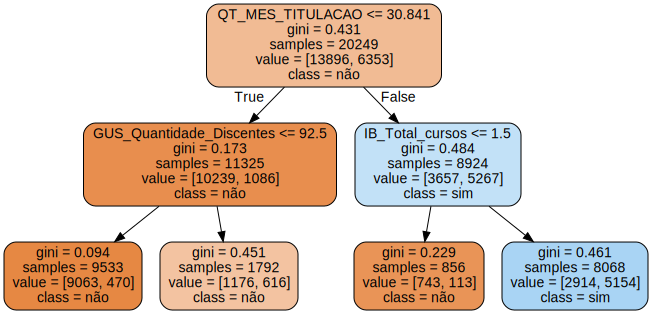

In [24]:
import graphviz
from sklearn.tree import export_graphviz


modelo.fit(X, y)
dot_data = export_graphviz(modelo, out_file = None, filled = True, rounded = True, class_names = ['não','sim'],
               feature_names=X.columns)

graph = graphviz.Source(dot_data)
graph

## Procurando a melhor árvore

In [26]:
def roda_arvore_de_decisao_com_treino(max_depth, printar = False):
    SEED = 301
    np.random.seed(SEED)

    cv = KFold(n_splits = 10)
    modelo = DecisionTreeClassifier(max_depth=max_depth)
    results = cross_validate(modelo, X_train, y_train, cv = cv, return_train_score=True)
    media_teste = results['test_score'].mean() * 100
    media_treino = results['train_score'].mean() * 100
    if printar:
        print(f'Arvore max_depth: {max_depth}, media_teste: {media_teste}, media_treino: {media_treino}')
    tabela = [max_depth, media_treino, media_teste]
    return tabela

resultados = [roda_arvore_de_decisao_com_treino(max_depth=i, printar = True) for i in range(1,10)]

resultados = pd.DataFrame(resultados, columns = ["max_depth","train","test"])

Arvore max_depth: 1, media_teste: 75.63127268818188, media_treino: 75.86582104604159
Arvore max_depth: 2, media_teste: 79.22236334336333, media_treino: 79.65053169734001
Arvore max_depth: 3, media_teste: 79.20119185430194, media_treino: 79.65131558069818
Arvore max_depth: 4, media_teste: 81.44471275156695, media_treino: 81.82273958851604
Arvore max_depth: 5, media_teste: 81.36010144796263, media_treino: 82.73364253094968
Arvore max_depth: 6, media_teste: 81.81868266953863, media_treino: 84.11724004329868
Arvore max_depth: 7, media_teste: 82.26316947244472, media_treino: 85.44674726875398
Arvore max_depth: 8, media_teste: 82.27736840481242, media_treino: 87.07962749341705
Arvore max_depth: 9, media_teste: 82.53845357551313, media_treino: 88.81206453024161


Text(0.5, 1.0, 'Performance do Modelo')

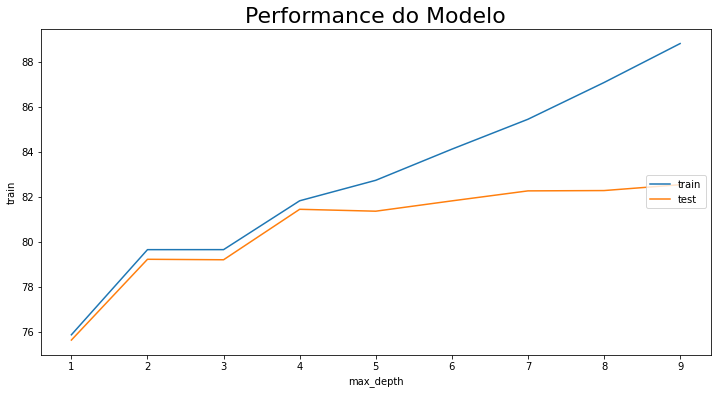

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(12,6))

sns.lineplot(x = "max_depth", y = "train", data = resultados)
sns.lineplot(x = "max_depth", y = "test", data = resultados)
plt.legend(['train','test'], loc = 'center right')
plt.title('Performance do Modelo', fontsize = 22)

## Usando Randomized Search com Decision Tree

In [28]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
import time
from sklearn.ensemble import RandomForestClassifier

In [71]:
espaco_de_parametros = {
    "max_depth" : randint(3,10),
    "min_samples_split" : randint(200,2000),
    "min_samples_leaf" : randint(200,2000),
    "criterion" : ["gini", "entropy"]
}

tic = time.time()
busca = RandomizedSearchCV(DecisionTreeClassifier(),
                    espaco_de_parametros,
                    n_iter=80,
                    cv = KFold(n_splits=10, shuffle=True), scoring='precision')
busca.fit(X_train, y_train)
tac = time.time()

print(f'Tempo: {tac - tic}')
resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

Tempo: 89.10149073600769


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.120398,0.001822,0.004223,0.000398,entropy,9,1018,413,"{'criterion': 'entropy', 'max_depth': 9, 'min_...",0.642166,0.665148,0.702830,0.663327,0.622180,0.638132,0.711905,0.719128,0.646000,0.751656,0.676247,0.040306,66
1,0.117498,0.001497,0.004101,0.000300,gini,9,827,689,"{'criterion': 'gini', 'max_depth': 9, 'min_sam...",0.642166,0.654275,0.668582,0.672956,0.622824,0.638132,0.672253,0.674330,0.642562,0.685057,0.657314,0.019152,70
2,0.091256,0.001506,0.004013,0.000448,entropy,3,1487,673,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.670854,0.665148,0.702830,0.731903,0.666667,0.669975,0.711905,0.719128,0.711957,0.699074,0.694944,0.023449,35
3,0.088999,0.001846,0.003801,0.000400,entropy,3,1723,298,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.670854,0.665148,0.702830,0.731903,0.666667,0.669975,0.711905,0.719128,0.711957,0.699074,0.694944,0.023449,35
4,0.093215,0.001606,0.004002,0.000448,gini,4,1247,1094,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",0.670854,0.680387,0.715347,0.740947,0.672823,0.669975,0.721271,0.732143,0.705056,0.710462,0.701927,0.025239,14


In [30]:
from sklearn.model_selection import cross_val_score

In [72]:
def imprime_score(scores):
    media = scores.mean()
    desvio_padrao = scores.std()
    print(f"Accuracy médio: {media * 100}")
    print(f'Acurácia intervalo: [{round((media - (2* desvio_padrao))*100, 2)}, {round((media + (2 * desvio_padrao))*100,2)}]')

tic = time.time()

scores = cross_val_score(busca, X_train,y_train, cv = KFold(n_splits=10, shuffle=True), scoring='f1')

tac = time.time()

print(f'Tempo: {tac - tic}')
imprime_score(scores)

Tempo: 824.2924528121948
Accuracy médio: 69.19980715721117
Acurácia intervalo: [63.52, 74.88]


In [60]:
busca.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=423,
                       min_samples_split=703)

## Testando o modelo

In [65]:
modelo = busca.best_estimator_

In [66]:
modelo.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=423,
                       min_samples_split=703)

In [67]:
y_pred = modelo.predict(X_test)

In [68]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def display_scores(y_test, y_pred):
    print(f"Accuracy score: {round(accuracy_score(y_test, y_pred)*100, 2)}%")
    print(f"F1-score: {round(f1_score(y_test, y_pred)*100, 2)}%")
    print(f"Precision score: {round(precision_score(y_test, y_pred)*100, 2)}%")
    print(f"Recall score: {round(recall_score(y_test, y_pred)*100, 2)}%")

display_scores(y_test, y_pred)

Accuracy score: 79.54%
F1-score: 71.86%
Precision score: 63.25%
Recall score: 83.18%


## Visualizando

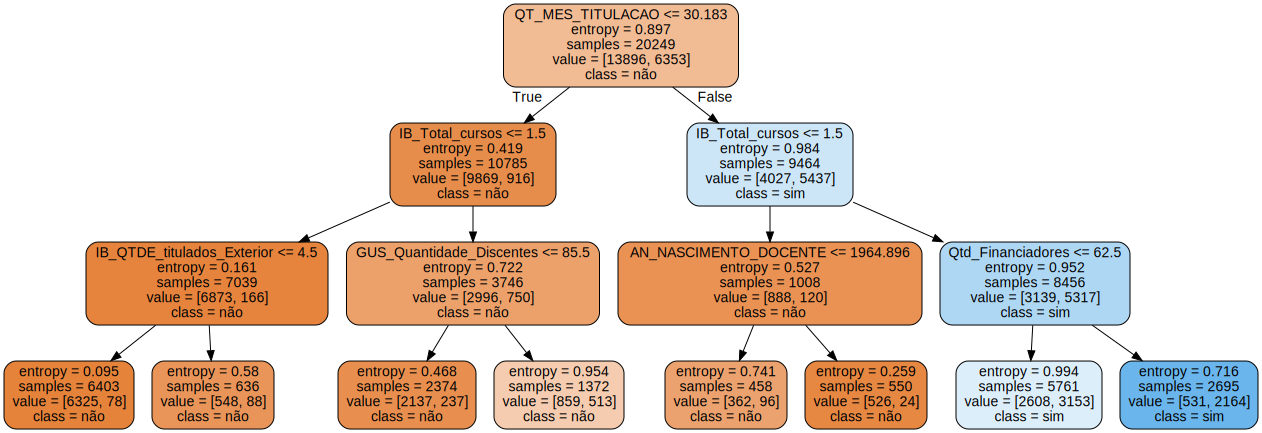

In [69]:
import graphviz
from sklearn.tree import export_graphviz

dot_data = export_graphviz(modelo, out_file = None, filled = True, rounded = True, class_names = ['não','sim'],
               feature_names=X.columns)

graph = graphviz.Source(dot_data)
graph

In [70]:
print("Features mais importantes para o Decision Tree")
pd.Series(modelo.feature_importances_, X_train.columns).sort_values(ascending = False).head(10)

Features mais importantes para o Decision Tree


QT_MES_TITULACAO              0.653284
IB_Total_cursos               0.213354
Qtd_Financiadores             0.059258
GUS_Quantidade_Discentes      0.042985
IB_QTDE_titulados_Exterior    0.023697
AN_NASCIMENTO_DOCENTE         0.007421
GUS_Dis_Homens                0.000000
GUS_Dis_Mulheres              0.000000
GUS_Dis_Brasileiros           0.000000
GUS_Dis_Estrangeiros          0.000000
dtype: float64

## Usando Randomized Search com Random Forest

In [52]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
import time
from sklearn.ensemble import RandomForestClassifier

SEED = 301
np.random.seed(SEED)

espaco_de_parametros = {
    "n_estimators": randint(10,101),
    "bootstrap": [True, False],
    "max_depth" : randint(3,6),
    "min_samples_split" : randint(32,129),
    "min_samples_leaf" : randint(32,129),
    "criterion" : ["gini", "entropy"]
}

tic = time.time()
busca_rnd_forest = RandomizedSearchCV(RandomForestClassifier(),
                    espaco_de_parametros,
                    n_iter=20,
                    cv = KFold(n_splits=5, shuffle=True))
busca_rnd_forest.fit(X_train, y_train)
tac = time.time()

print(f'Tempo: {tac - tic}')
resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

Tempo: 81.61448955535889


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.146287,0.022547,0.027810,0.000971,False,gini,3,50,93,89,"{'bootstrap': False, 'criterion': 'gini', 'max...",0.818695,0.798236,0.813757,0.815520,0.832745,0.815791,0.011030,15
1,0.783778,0.028569,0.025600,0.000797,True,gini,3,88,104,80,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.821164,0.798942,0.814462,0.816578,0.830981,0.816425,0.010430,14
2,0.750029,0.004689,0.024202,0.000986,True,gini,3,126,84,77,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.819753,0.798236,0.816226,0.814462,0.828158,0.815367,0.009776,16
3,0.496033,0.005526,0.017202,0.000400,True,gini,3,57,73,50,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.820106,0.794004,0.813051,0.815873,0.832392,0.815085,0.012441,17
4,0.832319,0.010928,0.024598,0.001628,True,gini,4,52,88,68,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.831041,0.810229,0.822928,0.817284,0.838038,0.823904,0.009823,7


In [53]:
from sklearn.model_selection import cross_val_score
modelo_random_forest = busca_rnd_forest.best_estimator_

tic = time.time()
scores = cross_val_score(modelo_random_forest, X,y, cv = KFold(n_splits=5, shuffle=True), scoring='f1')   #Muito tempo para executar
tac = time.time()

print(f'Tempo: {tac - tic}')
imprime_score(scores)

Tempo: 9.81601619720459
Accuracy médio: 82.60654025227994
Acurácia intervalo: [81.63, 83.59]


In [57]:
modelo_random_forest = busca_rnd_forest.best_estimator_
modelo_random_forest.fit(X_train, y_train)
y_pred = modelo_random_forest.predict(X_test)

print(f"F1-score: {round(f1_score(y_test, y_pred)*100, 2)}%")
print(f"Precision score: {round(precision_score(y_test, y_pred)*100, 2)}%")
print(f"Recall score: {round(recall_score(y_test, y_pred)*100, 2)}%")


F1-score: 70.4%
Precision score: 72.28%
Recall score: 68.61%


In [43]:
df['Predicao'] = modelo_random_forest.predict(X)

In [44]:
from sklearn.metrics import confusion_matrix

confusion_matrix(df['BOM_CONCEITO'], df['Predicao'])

array([[12292,  1604],
       [ 1866,  4487]], dtype=int64)

In [51]:
print("Features mais importantes para o Random Forest")
pd.Series(modelo_random_forest.feature_importances_, X_train.columns).sort_values(ascending = False).head(10)

QT_MES_TITULACAO            0.200323
IB_Total_cursos             0.157823
GUS_Dis_Brasileiros         0.121651
GUS_Quantidade_Discentes    0.098963
GUS_Dis_Estrangeiros        0.046195
GUS_diferenca_idade         0.044928
GUS_Dis_Mulheres            0.040332
GUS_Quantidade_Trabalhos    0.038083
GUS_Dis_Homens              0.032225
Qtd_Financiadores           0.029369
dtype: float64